<a href="https://colab.research.google.com/github/harshal1801/CVlab/blob/main/CV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skimage
from skimage.io import imread
from skimage import io
from skimage.feature import greycomatrix
from skimage.color import rgb2gray
import imageio
import cv2
from matplotlib import pyplot as plt

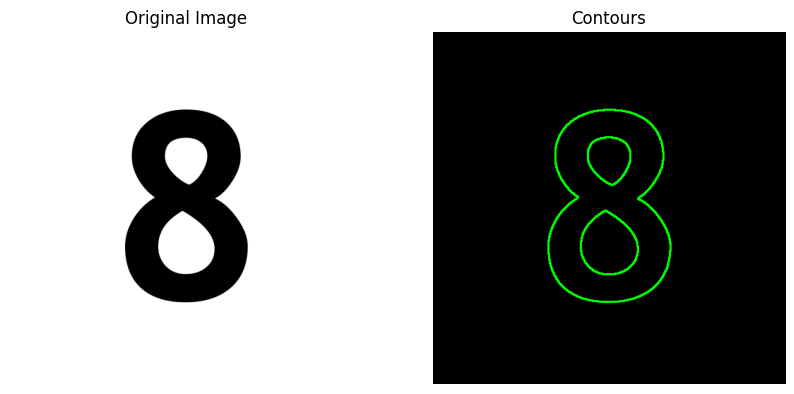

Chain Code for Contour 
 1 : [3, 4, 2, 3, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 7, 7, 6, 6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 4, 4]
Chain Code for Contour 
 2 : [1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 0]
Chain Code for Contour 
 3 : [1, 2, 2, 3, 4, 5, 6, 7]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/ate.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%20==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)